In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import random
import shutil
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!pip install pandas scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_halal = load_model("/content/drive/MyDrive/Colab Notebooks/Models/fyp_halal_model_fine_tuned2.h5")
model_haram = load_model("/content/drive/MyDrive/Colab Notebooks/Models/fyp_haram_model.h5")

In [ ]:
model_halal.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 19)                24339     
                                                             

In [ ]:
model_haram.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 21)                26901     
                                                             

In [ ]:
class_names_halal = ['Big Raho Fish',
                    'Black Water Rahu',
                    'Cat Fish',
                    'Dhari Fish',
                    'Dilwar Fish',
                    'Heera Fish',
                    'Jalabi Paplet Fish',
                    'Moi Fish',
                    'Naiser Fish',
                    'Paplet Fish',
                    'Parrot Fish',
                    'Rahu Fish',
                    'Red Snapper Fish',
                    'Ringi Cat Fish',
                    'Safi Fish',
                    'Sarum Fish',
                    'Silver Carp Fish',
                    'Tacan Fish',
                    'Zandia or Dhandia Fish']

In [ ]:
class_names_haram = ['Angel Fish',
                      'Black Ghost Knife Fish',
                      'Blue Line Shark',
                      'Carp',
                      'Catfish',
                      'Clownfish (Nemo)',
                      'Demasoni Cichlid',
                      'Diamond Carp',
                      'Green Severum',
                      'King Firefish',
                      'Kite Fish',
                      'KoiQue',
                      'Mono Angel',
                      'Oscar Fish',
                      'Pirate Chiplet',
                      'Red Jewel',
                      'Red Tetratick',
                      'ShrimpChiplet',
                      'Skate Fish',
                      'Tekra Family',
                      'TictletChiplet (color variants)']

In [ ]:
len(class_names_halal)

19

In [ ]:
len(class_names_haram)

21

In [ ]:
test_dir_halal = '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test'
test_dir_haram = '/content/drive/MyDrive/Haram Fish dataset/Fish_Splitted_Self/test'

In [234]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  img2 = tf.image.resize(img, [896, 896])
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255., img2
  else:
    return img, img2

In [224]:
# Make predictionss on a series of random images
def make_preds(m, class_names, test_dir, n=3, resize=True):
  plt.figure(figsize=(20, 30))
  i = 0
  while i < n:
    # Choose a random image from a random class
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + "/" + class_name))
    filepath = test_dir + "/" + class_name + "/" + filename

    # Load the image and make predictions
    img, img2 = load_and_prep_image(filepath, 224, scale=False) # don't scale images for EfficientNet predictions
    pred_prob = m.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
    pred_class = class_names[pred_prob.argmax()] # find the predicted class

    if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
      title_color = "g"
    else:
      continue
      title_color = "r"

    # Plot the image(s)
    plt.subplot(3, 1, i+1)
    plt.imshow(img2/255.)
    plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
    plt.axis(False)
    i+=1

  return pred_class

In [235]:
make_preds(model_halal, class_names_halal, test_dir_halal)

Output hidden; open in https://colab.research.google.com to view.

1/1 [==============================] - 0s 83ms/step


'Demasoni Cichlid'

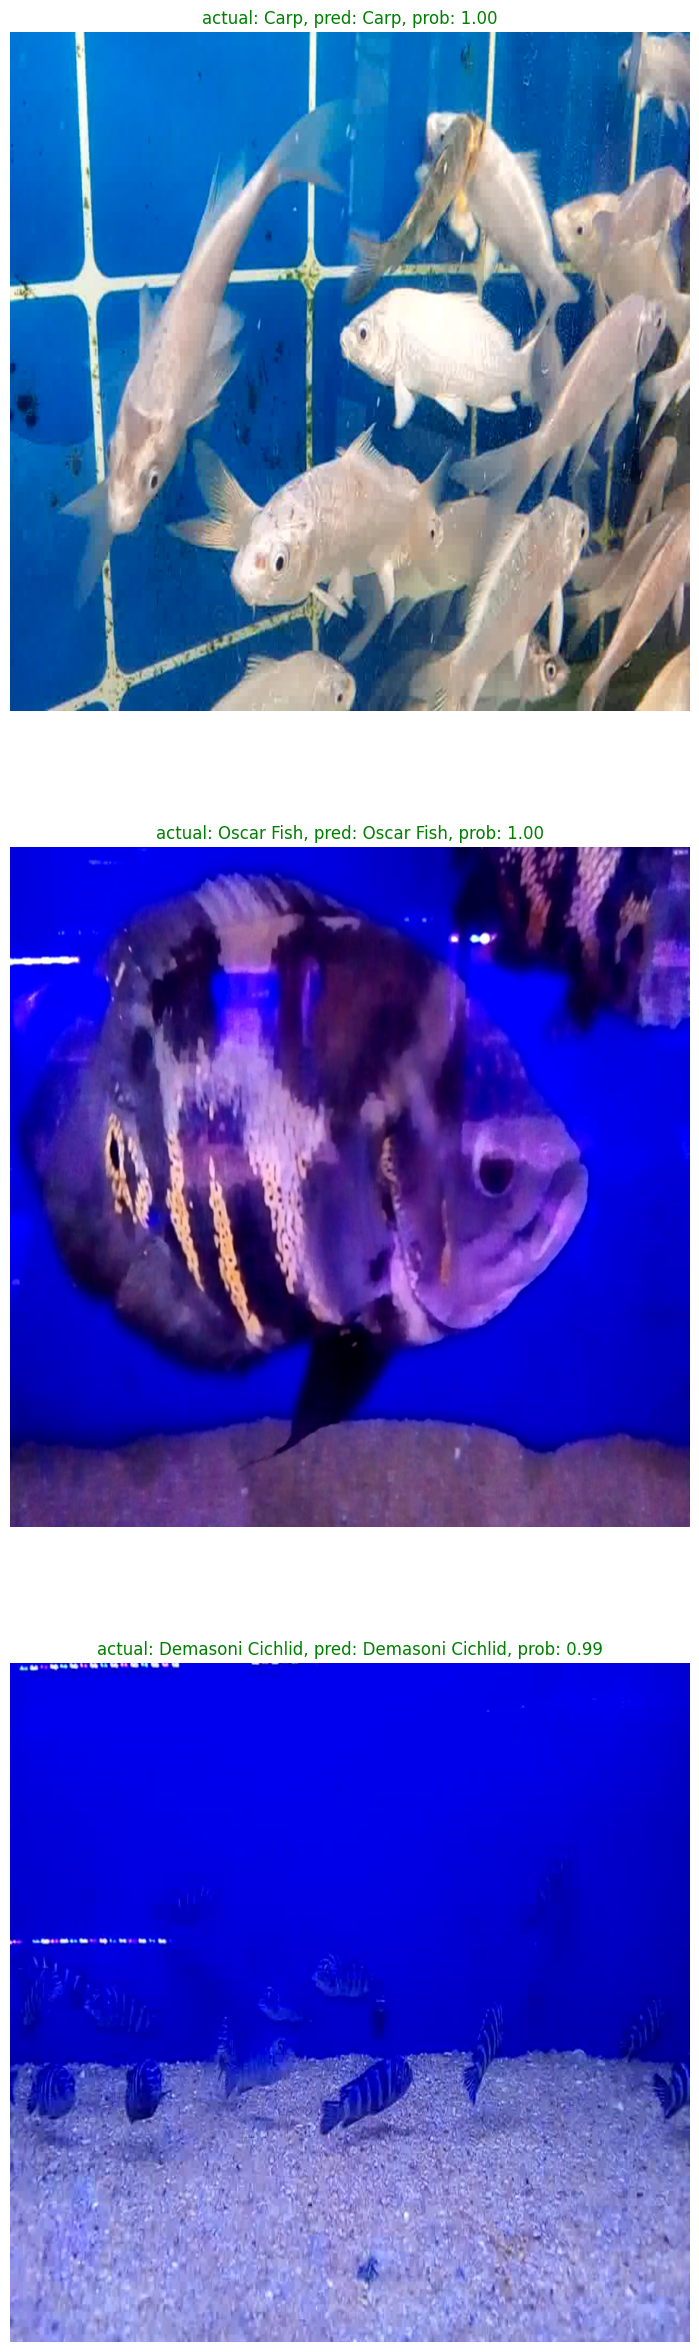

In [236]:
make_preds(model_haram, class_names_haram, test_dir_haram)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FYP/Mapper Sheet.xlsx')
df

Fish       Soil
0                 Kitefish  Alkaline
1            King Firefish  Alkaline
2            Green Severum  Alkaline
3             Diamond Carp  Alkaline
4             Tekra Family  Alkaline
5            Red Tetratick  Alkaline
6               Mono Angel  Alkaline
7         Silver Carp Fish  Alkaline
8       Jalabi Paplet Fish  Alkaline
9   Zandia or Dhandia Fish  Alkaline
10             Paplet Fish  Alkaline
11             Dilwar Fish  Alkaline
12             Naiser Fish  Alkaline
13               Safi Fish  Alkaline
14  Black Ghost Knife Fish   Mixture
15                 Catfish   Mixture
16                    Carp   Mixture
17                  KoiQue   Mixture
18              Skate Fish   Mixture
19               Red Jewel   Mixture
20          Pirate Chiplet   Mixture
21             Parrot Fish   Mixture
22              Dhari Fish   Mixture
23              Tacan Fish   Mixture
24                Cat Fish   Mixture
25                Moi Fish   Mixture
26              Heera Fish   Mixture
27              Sarum Fish   Mixture
28              Angel Fish    Saline
29         Blue Line Shark    Saline
30        Demasoni Cichlid    Saline
31        Clownfish (Nemo)    Saline
32              Oscar Fish    Saline
33           ShrimpChiplet    Saline
34           Big Raho Fish    Saline
35               Rahu Fish    Saline
36          Ringi Cat Fish    Saline
37        Red Snapper Fish    Saline
38        Black Water Rahu    Saline

In [ ]:
le_fish = LabelEncoder()
le_soil = LabelEncoder()

df['Fish '] = le_fish.fit_transform(df['Fish '])
df['Soil'] = le_soil.fit_transform(df['Soil'])

X = df[['Fish ']]
y = df['Soil']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

def predict_soil(fish):
    fish_encoded = le_fish.transform([fish])
    soil_encoded = model.predict([fish_encoded])
    return le_soil.inverse_transform(soil_encoded)[0]

def predict_fish(soil):
    soil_encoded = le_soil.transform([soil])
    fish_encoded = model.predict([soil_encoded])
    return le_fish.inverse_transform(fish_encoded)[0]

1/1 [==============================] - 0s 133ms/step


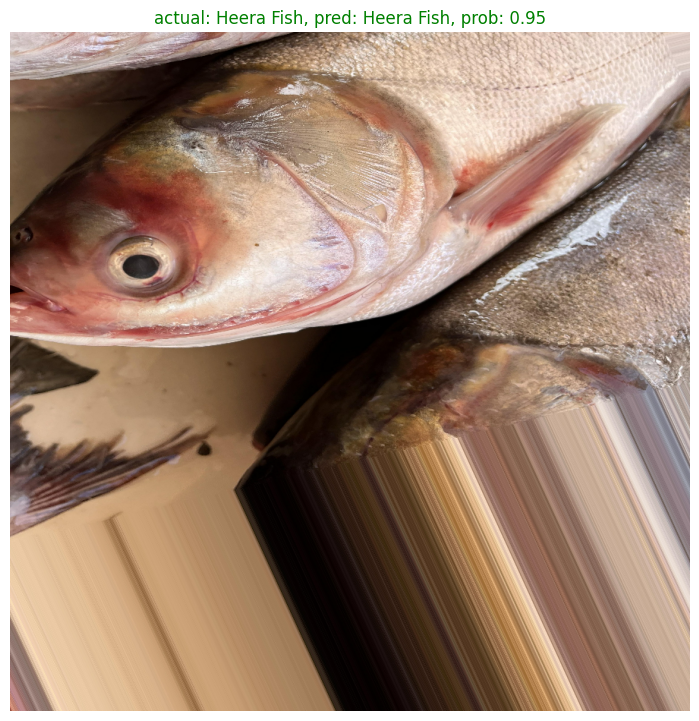

In [237]:
predicted_class = make_preds(model_halal, class_names_halal, test_dir_halal, 1)

In [238]:
predicted_soil = predict_soil(predicted_class)
print(f"The most compatible soil type for {predicted_class} is: {predicted_soil}")

The most compatible soil type for Heera Fish is: Alkaline


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [239]:
path = '/content/drive/MyDrive/Soil dataset/JPG Soil dataset/train'
if predicted_soil == 'Mixture':
  pred_class_path = os.path.join(path, 'MIX')

elif predicted_soil == 'Saline':
  pred_class_path = os.path.join(path, 'Kahra zameen')

else:
  pred_class_path = os.path.join(path, 'Mitha pani ki zameen')

pred_class_path

'/content/drive/MyDrive/Soil dataset/JPG Soil dataset/train/Mitha pani ki zameen'

(-0.5, 895.5, 895.5, -0.5)

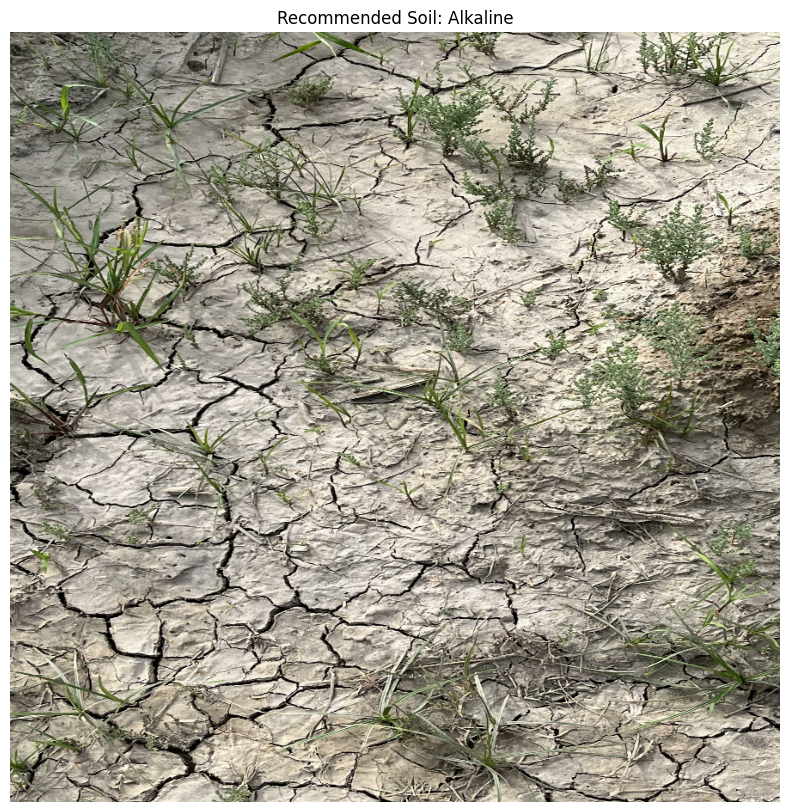

In [241]:
plt.figure(figsize=(10, 10))
img_path = os.path.join(pred_class_path, random.choice(os.listdir(pred_class_path)))
img, img2 = load_and_prep_image(img_path, scale=False)
plt.imshow(img2/255.)
plt.title(f"Recommended Soil: {predicted_soil}")
plt.axis(False)